# Random Initialization

Random initialization of ReLU layers typically use the He et al. formulation of $N(0, \sqrt\frac{2}{\text{fan_in}})$ however this is only an approximation of a variance scaling initialization. A more accurate scaling would use $N(0, \sqrt\frac{2}{Var(W)})$.

## References

- https://arxiv.org/abs/1502.01852

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
def swish(x):
    return x * tf.math.sigmoid(x)

In [473]:
def random_binomial(shape, p=0.0, dtype=tf.dtypes.float32, seed=None):
    return tf.where(
        tf.random.uniform(shape, dtype=dtype, seed=seed) <= p,
        tf.ones(shape, dtype=dtype),
        tf.zeros(shape, dtype=dtype))

In [553]:
class Bimodal(tf.keras.initializers.Initializer):
    def __init__(self, stddev=1.0, dtype=tf.dtypes.float32, seed=None):
        super(BimodalNormal, self).__init__()
        self.stddev = stddev
        self.dtype = dtype
        self.seed = seed

    def __call__(self, shape, dtype=None, partition_info=None):
        if dtype is None:
            dtype = self.dtype

        fan_in, fan_out = shape[:2]
        mean = self.stddev * 2.0

        a = tf.random.normal(shape, mean=+mean, stddev=self.stddev, dtype=dtype)
        b = tf.random.normal(shape, mean=-mean, stddev=self.stddev, dtype=dtype)
        mix = random_binomial(shape=[fan_in, fan_out], p=0.5, dtype=dtype, seed=seed)
        init = mix * a + (1 - mix) * b

        return init

In [556]:
kernel_initializer = BimodalNormal(stddev=tf.sqrt(0.2 / 100))
# kernel_initializer = tf.keras.initializers.VarianceScaling(1)

dense = tf.keras.layers.Dense(
    units=1000,
    activation=None,
    kernel_initializer=kernel_initializer)

inputs = tf.random.normal(shape=[100, 100], mean=0.0, stddev=1.0)
outputs = dense(inputs)

mean = tf.math.reduce_mean(outputs)
variance = tf.math.reduce_mean(tf.math.reduce_variance(outputs, axis=0))

print('mean:', mean.numpy(), 'variance:', variance.numpy())

mean: 0.0004705133 variance: 1.0301987


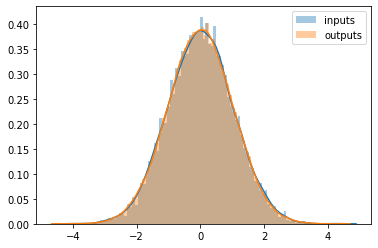

In [557]:
sns.distplot(inputs.numpy().flatten(), bins=100, label='inputs')
sns.distplot(outputs.numpy().flatten(), bins=100, label='outputs')
plt.legend()

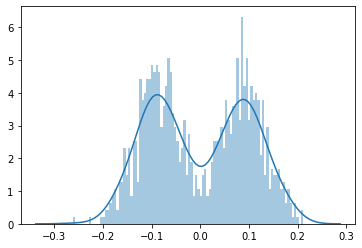

In [558]:
sns.distplot(dense.kernel[0].numpy().flatten(), bins=100)